# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2021-1**<br>
**Profesora:** Paula Aguirre <br>

## Clases 22: Regresión Lasso y Ridge.



## 1. Ejemplo: Regresión polinomial y overfitting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



Bad key text.latex.preview in file /Users/paguirre/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/paguirre/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/paguirre/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the defau

In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

#número de datos 
nsamples=30

#conjunto total de datos: una función conocida (true_fun) más ruido aleatorio
X = np.sort(np.random.rand(nsamples))
y = true_fun(X) + np.random.randn(nsamples) * 0.2

#separación en datos de entrenamiento y prueba
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.25)

#Xtest = np.sort(np.random.rand(10))
#ytest = true_fun(Xtest) + np.random.randn(10) * 0.1

#reshape de matriz X
Xtrain=Xtrain[:, np.newaxis]
Xtest=Xtest[:, np.newaxis]

#vector x continuo para graficar modelo
x_vals = np.linspace(np.min(X), np.max(X), 100).reshape(-1,1)


[ 0.         -1.58966278]
[ 0.         -7.40031287  5.57468255]
[ 0.         -2.01039945 -9.63254182 13.89401262 -3.52756225]
[    0.            35.02210729  -526.32702658  2845.13906747
 -7712.63224865 11299.70887061 -8826.71604184  3263.67151185
  -378.1486783 ]
[ 0.00000000e+00  2.41435983e+02 -5.07502796e+03  4.83535119e+04
 -2.53156121e+05  7.97829266e+05 -1.58076183e+06  1.98486557e+06
 -1.53346277e+06  6.65146002e+05 -1.23978054e+05]
[ 0.00000000e+00 -1.72081675e+04  5.72369511e+05 -9.85896525e+06
  1.02735573e+08 -7.03732500e+08  3.33506489e+09 -1.12965114e+10
  2.78870790e+10 -5.06259319e+10  6.75168876e+10 -6.53403332e+10
  4.46308812e+10 -2.03941369e+10  5.59341031e+09 -6.96108952e+08]


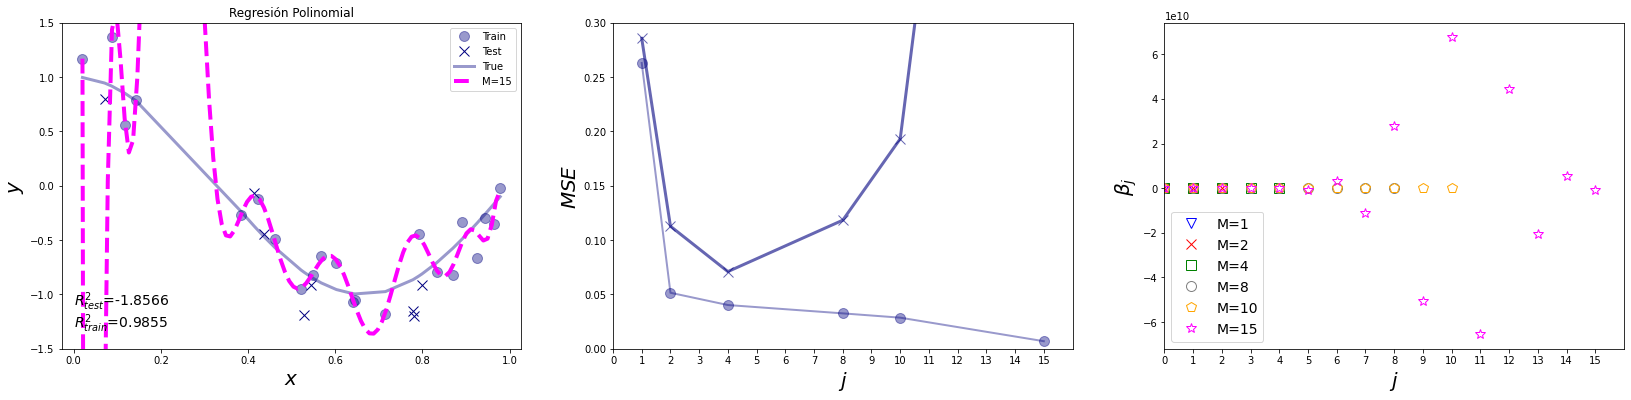

In [3]:
#configuración de los gráficos
fig, (ax1,ax3,ax2) = plt.subplots(1,3, figsize=(28,6))

ax2.set_ylabel(r'$\beta_j$',fontsize=20)
ax2.set_xlabel(r'$j$',fontsize=20)
ax2.set_xticks(np.arange(16))
ax2.set_xlim(0,16)
color=['b','r','g','gray','orange','magenta']
markers=['v','x','s','o','p','*']

#grados de los polinomios a probar
degrees = [1,2,4,8, 10,15]

# Listas vacías para guardar errores de entrenamiento y validación
training_error, validation_error = [],[]

for nd,d in enumerate(degrees):
    
    #Cálculo de  polynomial features para datos de entrenamiento y prueba
    x_poly_train = PolynomialFeatures(d).fit_transform(Xtrain)
    x_poly_test = PolynomialFeatures(d).fit_transform(Xtest)
    
    #regresor lineal: ytrain=beta*x_poly_train
    lreg = LinearRegression()
    lreg.fit(x_poly_train, ytrain)

    #coeficientes de la regresión
    print(lreg.coef_)
    
    #predecimos respuesta para datos de entrenamiento y prueba
    y_train_pred = lreg.predict(x_poly_train)
    y_test_pred = lreg.predict(x_poly_test)
    
    #Cálculo de error (MSE) para datos de entrenamiento y prueba
    training_error.append(mean_squared_error(y_train_pred,ytrain))
    validation_error.append(mean_squared_error(y_test_pred,ytest))
    
    train_score = lreg.score(x_poly_train,ytrain)
    test_score = lreg.score(x_poly_test, ytest)
    
    #predecimos respuesta para un vector x continuo, para graficar el modelo
    x_model=PolynomialFeatures(d).fit_transform(x_vals)
    y_model=lreg.predict(x_model)
    
    #gráficos
    
    #ax1: datos de entrada + modelo
    ax1.clear()
    ax1.plot(Xtrain, ytrain, 'o',color='navy',label='Train',markersize=10,alpha=0.4) 
    ax1.plot(Xtest, ytest, 'x',color='navy',mfc='None',label='Test',markersize=10) 
    ax1.plot(X, true_fun(X), '-',color='navy',label='True',lw=3,alpha=0.4) 
    ax1.set_xlabel(r'$x$',fontsize=20)
    ax1.set_ylabel(r'$y$',fontsize=20)
    ax1.set_ylim(-1.5,1.5)
    ax1.plot(x_vals,y_model,'--',lw=4,label='M=%d'%d,color=color[nd])
    ax1.text(0,-1.3,r'$R^2_{train}$=%.4f'%train_score,fontsize=14)
    ax1.text(0,-1.1,r'$R^2_{test}$=%.4f'%test_score,fontsize=14)
    ax1.set_title('Regresión Polinomial')
    ax1.legend(loc=1);
    
    #ax3: MSE vs. grado del polinomio (panel central)
    ax3.clear()
    ax3.set_xticks(np.arange(d+1))
    ax3.set_xlabel(r'$j$',fontsize=20)
    ax3.set_ylabel(r'$MSE$',fontsize=20)
    ax3.set_xlim(0,16)
    ax3.set_ylim(0,0.3)

    ax3.plot(degrees[0:nd+1],training_error,'-o',markersize=10,alpha=0.4,color='navy',lw=2,label='Test')
    ax3.plot(degrees[0:nd+1],validation_error,'-x',markersize=10,alpha=0.6,color='navy',lw=3,label='Train')
    
    if nd==0:
        ax3.legend(loc=1);
        
    #ax2 (derecha): coeficientes de la regresión para distintos modelos
    ax2.plot(np.arange(d+1),lreg.coef_,marker=markers[nd],color=color[nd],linestyle='None',markersize=10,lw=6,mfc='None',label='M=%d'%d)
    ax2.legend(loc=3,prop={"size":14});
    
    #guardo todas las figuras para la PPT  
    fig.savefig('%d_fig_%d.png'%(nsamples,d),bbox_inches='tight')


## 2. Regresión Ridge

Alpha: 0.001
Alpha: 1


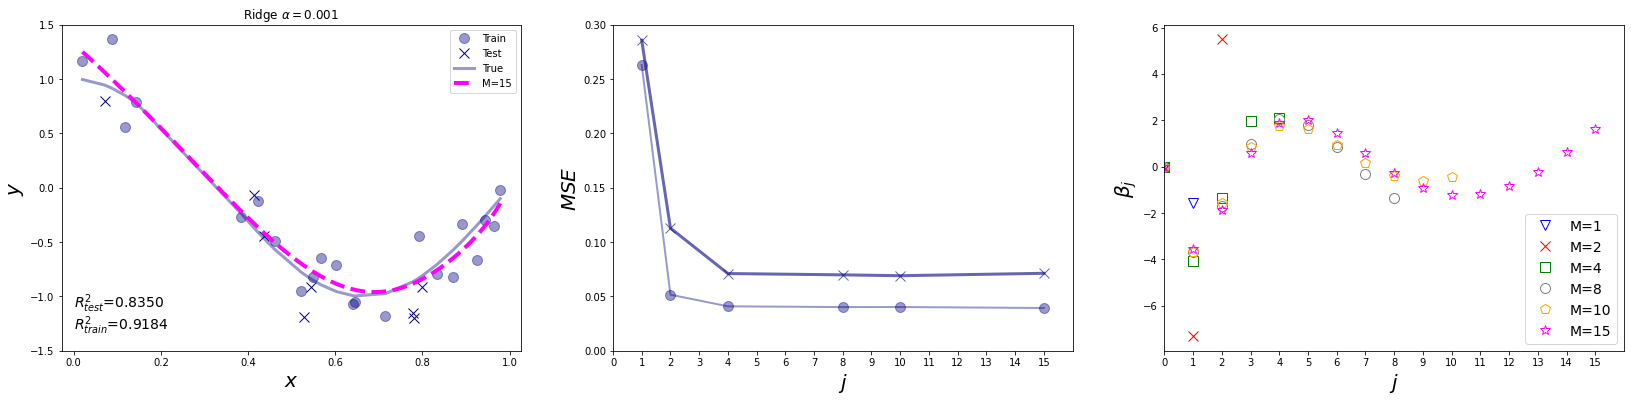

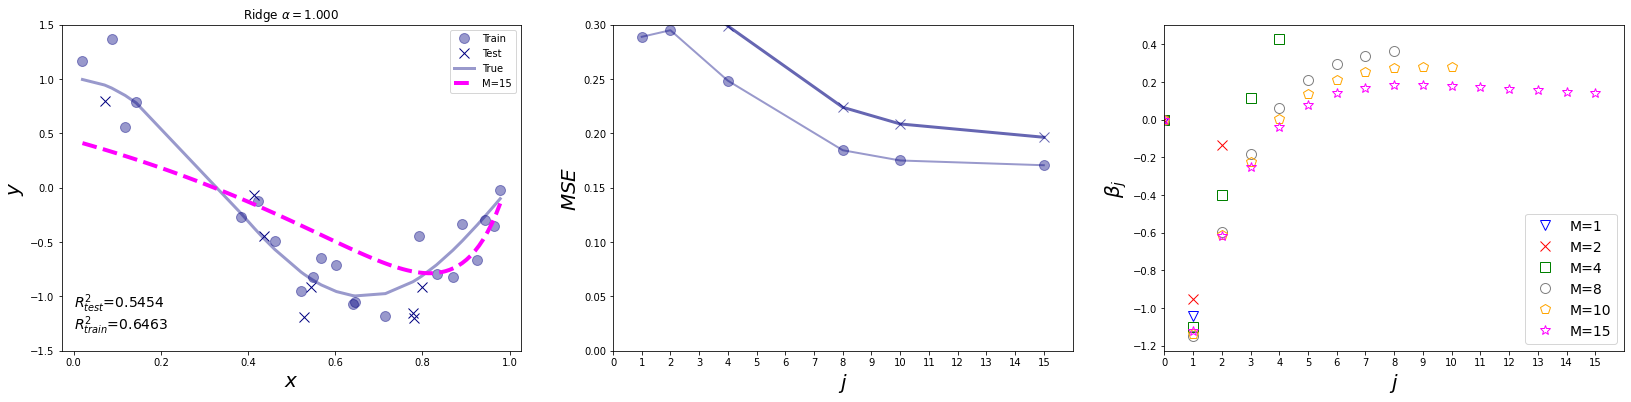

In [4]:
from sklearn.linear_model import Ridge


for na,al in enumerate([0.001,1]): 
    print('Alpha:',al)
    
    #configuración de los gráficos
    fig, (ax1,ax3,ax2) = plt.subplots(1,3, figsize=(28,6))

    ax2.set_ylabel(r'$\beta_j$',fontsize=20)
    ax2.set_xlabel(r'$j$',fontsize=20)
    ax2.set_xticks(np.arange(16))
    ax2.set_xlim(0,16)
    color=['b','r','g','gray','orange','magenta']
    markers=['v','x','s','o','p','*']


    #grados de los polinomios a probar
    degrees = [1,2,4,8, 10,15]

    # Listas vacías para guardar errores de entrenamiento y validación
    training_error, validation_error = [],[]

    for nd,d in enumerate(degrees):

        #Cálculo de  polynomial features para datos de entrenamiento y prueba
        x_poly_train = PolynomialFeatures(d).fit_transform(Xtrain)
        x_poly_test = PolynomialFeatures(d).fit_transform(Xtest)

        #regresor lineal: ytrain=beta*x_poly_train
        rreg = Ridge(alpha=al)
        rreg.fit(x_poly_train, ytrain)

        #coeficientes de la regresión
        #print(rreg.coef_)

        #predecimos respuesta para datos de entrenamiento y prueba
        y_train_pred = rreg.predict(x_poly_train)
        y_test_pred = rreg.predict(x_poly_test)

        #Cálculo de error (MSE) para datos de entrenamiento y prueba
        training_error.append(mean_squared_error(y_train_pred,ytrain))
        validation_error.append(mean_squared_error(y_test_pred,ytest))

        train_score = rreg.score(x_poly_train,ytrain)
        test_score = rreg.score(x_poly_test, ytest)


        #predecimos respuesta para un vector x continuo, para graficar el modelo
        x_model=PolynomialFeatures(d).fit_transform(x_vals)
        y_model=rreg.predict(x_model)

        #gráficos

        #ax1: datos de entrada + modelo
        ax1.clear()
        ax1.plot(Xtrain, ytrain, 'o',color='navy',label='Train',markersize=10,alpha=0.4) 
        ax1.plot(Xtest, ytest, 'x',color='navy',mfc='None',label='Test',markersize=10) 
        ax1.plot(X, true_fun(X), '-',color='navy',label='True',lw=3,alpha=0.4) 
        ax1.set_xlabel(r'$x$',fontsize=20)
        ax1.set_ylabel(r'$y$',fontsize=20)
        ax1.set_ylim(-1.5,1.5)
        ax1.plot(x_vals,y_model,'--',lw=4,label='M=%d'%d,color=color[nd])
        ax1.text(0,-1.3,r'$R^2_{train}$=%.4f'%train_score,fontsize=14)
        ax1.text(0,-1.1,r'$R^2_{test}$=%.4f'%test_score,fontsize=14)
        ax1.set_title(r'Ridge $\alpha=$%.3f'%al)
        ax1.legend(loc=1);

        #ax3: MSE vs. grado del polinomio (panel central)
        ax3.clear()
        ax3.set_xticks(np.arange(d+1))
        ax3.set_xlabel(r'$j$',fontsize=20)
        ax3.set_ylabel(r'$MSE$',fontsize=20)
        ax3.set_xlim(0,16)
        ax3.set_ylim(0,0.3)

        ax3.plot(degrees[0:nd+1],training_error,'-o',markersize=10,alpha=0.4,color='navy',lw=2,label='Test')
        ax3.plot(degrees[0:nd+1],validation_error,'-x',markersize=10,alpha=0.6,color='navy',lw=3,label='Train')

        if nd==0:
            ax3.legend(loc=1);

        #ax2 (derecha): coeficientes de la regresión para distintos modelos
        ax2.plot(np.arange(d+1),rreg.coef_,marker=markers[nd],color=color[nd],linestyle='None',markersize=10,lw=6,mfc='None',label='M=%d'%d)
        ax2.legend(loc=4,prop={"size":14});

        #guardo todas las figuras para la PPT  
        fig.savefig('ridge_%.3f_%d.png'%(al,d),bbox_inches='tight')

## 3. Regresión Lasso

Alpha: 0.01
Alpha: 1


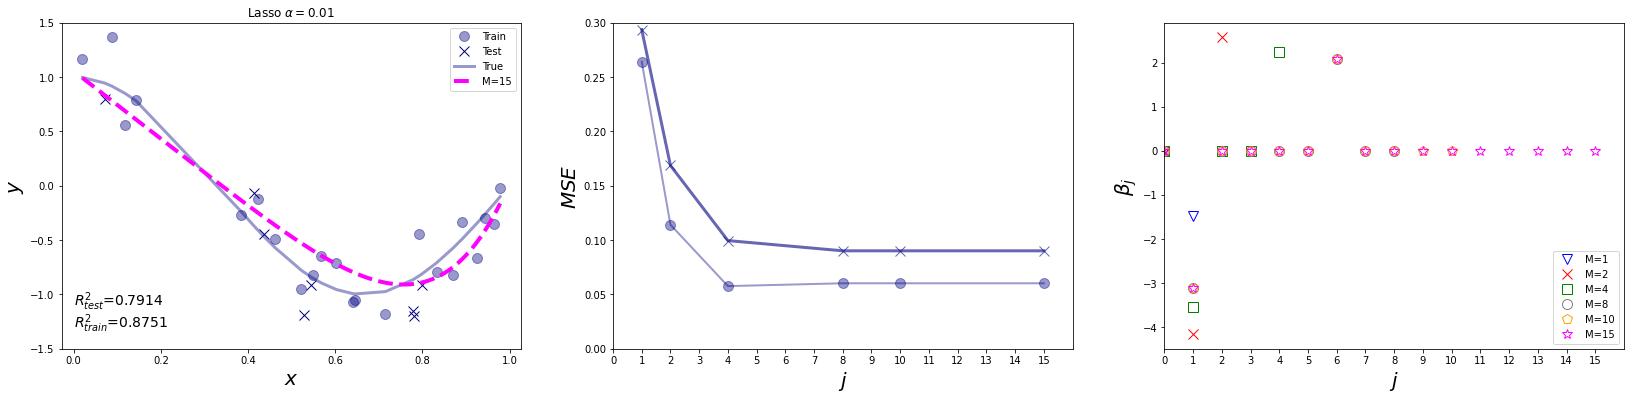

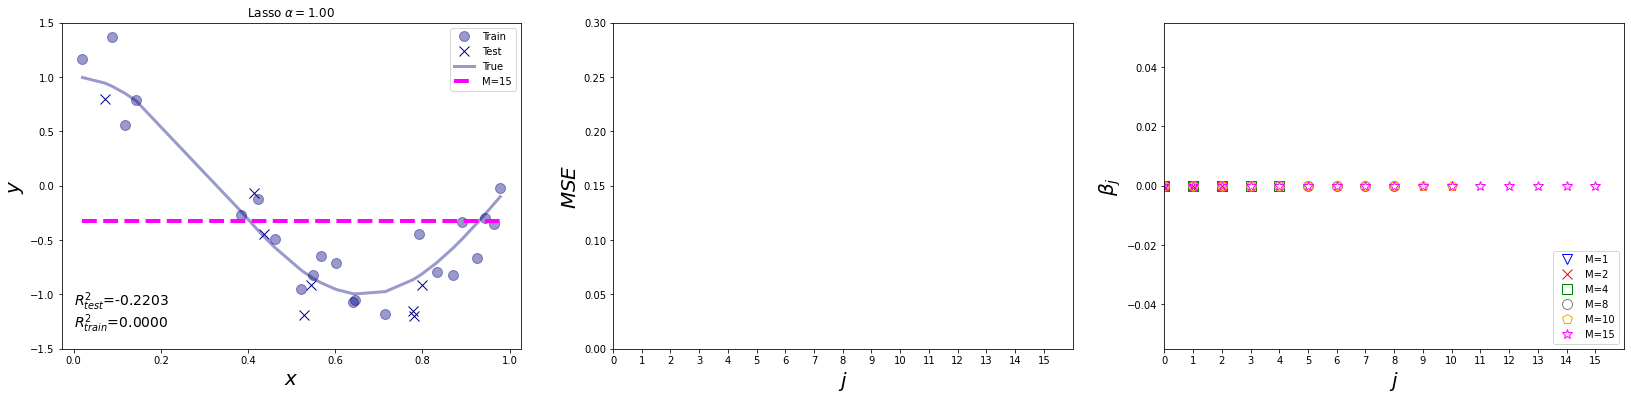

In [5]:
from sklearn.linear_model import Lasso


for na,al in enumerate([0.01,1]): 
    print('Alpha:',al)
    
    #configuración de los gráficos
    fig, (ax1,ax3,ax2) = plt.subplots(1,3, figsize=(28,6))

    ax2.set_ylabel(r'$\beta_j$',fontsize=20)
    ax2.set_xlabel(r'$j$',fontsize=20)
    ax2.set_xticks(np.arange(16))
    ax2.set_xlim(0,16)
    color=['b','r','g','gray','orange','magenta']
    markers=['v','x','s','o','p','*']


    #grados de los polinomios a probar
    degrees = [1,2,4,8, 10,15]

    # Listas vacías para guardar errores de entrenamiento y validación
    training_error, validation_error = [],[]

    for nd,d in enumerate(degrees):

        #Cálculo de  polynomial features para datos de entrenamiento y prueba
        x_poly_train = PolynomialFeatures(d).fit_transform(Xtrain)
        x_poly_test = PolynomialFeatures(d).fit_transform(Xtest)

        #regresor Lasso
        lasso = Lasso(alpha=al)
        lasso.fit(x_poly_train, ytrain)

        #coeficientes de la regresión
        #print(rreg.coef_)

        #predecimos respuesta para datos de entrenamiento y prueba
        y_train_pred = lasso.predict(x_poly_train)
        y_test_pred = lasso.predict(x_poly_test)

        #Cálculo de error (MSE) para datos de entrenamiento y prueba
        training_error.append(mean_squared_error(y_train_pred,ytrain))
        validation_error.append(mean_squared_error(y_test_pred,ytest))

        train_score = lasso.score(x_poly_train,ytrain)
        test_score = lasso.score(x_poly_test, ytest)


        #predecimos respuesta para un vector x continuo, para graficar el modelo
        x_model=PolynomialFeatures(d).fit_transform(x_vals)
        y_model=lasso.predict(x_model)

        #gráficos

        #ax1: datos de entrada + modelo
        ax1.clear()
        ax1.plot(Xtrain, ytrain, 'o',color='navy',label='Train',markersize=10,alpha=0.4) 
        ax1.plot(Xtest, ytest, 'x',color='navy',mfc='None',label='Test',markersize=10) 
        ax1.plot(X, true_fun(X), '-',color='navy',label='True',lw=3,alpha=0.4) 
        ax1.set_xlabel(r'$x$',fontsize=20)
        ax1.set_ylabel(r'$y$',fontsize=20)
        ax1.set_ylim(-1.5,1.5)
        ax1.plot(x_vals,y_model,'--',lw=4,label='M=%d'%d,color=color[nd])
        ax1.text(0,-1.3,r'$R^2_{train}$=%.4f'%train_score,fontsize=14)
        ax1.text(0,-1.1,r'$R^2_{test}$=%.4f'%test_score,fontsize=14)
        ax1.set_title(r'Lasso $\alpha=$%.2f'%al)
        ax1.legend(loc=1);

        #ax3: MSE vs. grado del polinomio (panel central)
        ax3.clear()
        ax3.set_xticks(np.arange(d+1))
        ax3.set_xlabel(r'$j$',fontsize=20)
        ax3.set_ylabel(r'$MSE$',fontsize=20)
        ax3.set_xlim(0,16)
        ax3.set_ylim(0,0.3)

        ax3.plot(degrees[0:nd+1],training_error,'-o',markersize=10,alpha=0.4,color='navy',lw=2,label='Test')
        ax3.plot(degrees[0:nd+1],validation_error,'-x',markersize=10,alpha=0.6,color='navy',lw=3,label='Train')

        if nd==0:
            ax3.legend(loc=1);

        #ax2 (derecha): coeficientes de la regresión para distintos modelos
        ax2.plot(np.arange(d+1),lasso.coef_,marker=markers[nd],color=color[nd],linestyle='None',markersize=10,lw=6,mfc='None',label='M=%d'%d)
        ax2.legend(loc=4);

        #guardo todas las figuras para la PPT  
        fig.savefig('lasso_%.2f_%d.png'%(al,d),bbox_inches='tight')